# to establish relationship between mpg and other attributes


In [17]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [18]:
data=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Yhills_July12_Analytics/main/auto-mpg.csv")

In [19]:
data.shape

(398, 9)

In [20]:
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [21]:
data=data.drop("car name",axis=1)
data.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin
287,16.5,8,351.0,138,3955,13.2,79,1
140,14.0,8,304.0,150,4257,15.5,74,1
175,29.0,4,90.0,70,1937,14.0,75,2
387,38.0,6,262.0,85,3015,17.0,82,1
39,14.0,8,400.0,175,4464,11.5,71,1
40,14.0,8,351.0,153,4154,13.5,71,1
50,28.0,4,116.0,90,2123,14.0,71,2
169,20.0,6,232.0,100,2914,16.0,75,1
351,34.4,4,98.0,65,2045,16.2,81,1
372,27.0,4,151.0,90,2735,18.0,82,1


In [22]:
data.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [23]:
data.dtypes

mpg       float64
cyl         int64
disp      float64
hp         object
wt          int64
acc       float64
yr          int64
origin      int64
dtype: object

In [24]:
data['origin']=data['origin'].replace({1:"usa",2:"asia",3:"europe"})
data.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin
315,24.3,4,151.0,90,3003,20.1,80,usa
196,24.5,4,98.0,60,2164,22.1,76,usa
282,22.3,4,140.0,88,2890,17.3,79,usa
325,44.3,4,90.0,48,2085,21.7,80,asia
386,25.0,6,181.0,110,2945,16.4,82,usa
41,14.0,8,318.0,150,4096,13.0,71,usa
322,46.6,4,86.0,65,2110,17.9,80,europe
336,23.6,4,140.0,?,2905,14.3,80,usa
18,27.0,4,97.0,88,2130,14.5,70,europe
363,22.4,6,231.0,110,3415,15.8,81,usa


In [25]:
##one hot encoding:convert catagorical data into numbers
data=pd.get_dummies(data,columns=["origin"])
data.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin_asia,origin_europe,origin_usa
120,19.0,4,121.0,112,2868,15.5,73,1,0,0
348,37.7,4,89.0,62,2050,17.3,81,0,1,0
38,14.0,8,350.0,165,4209,12.0,71,0,0,1
144,31.0,4,76.0,52,1649,16.5,74,0,1,0
155,15.0,6,250.0,72,3158,19.5,75,0,0,1
53,31.0,4,71.0,65,1773,19.0,71,0,1,0
140,14.0,8,304.0,150,4257,15.5,74,0,0,1
377,31.0,4,91.0,68,1970,17.6,82,0,1,0
337,32.4,4,107.0,72,2290,17.0,80,0,1,0
319,31.3,4,120.0,75,2542,17.5,80,0,1,0


In [26]:
data['hp']=data['hp'].replace(to_replace='?', value=np.nan)
data['hp']=data['hp'].astype(float)

In [29]:
median1=data['hp'].median()
data['hp'].replace(np.nan,median1,inplace=True)
data.dtypes

mpg              float64
cyl                int64
disp             float64
hp               float64
wt                 int64
acc              float64
yr                 int64
origin_asia        uint8
origin_europe      uint8
origin_usa         uint8
dtype: object

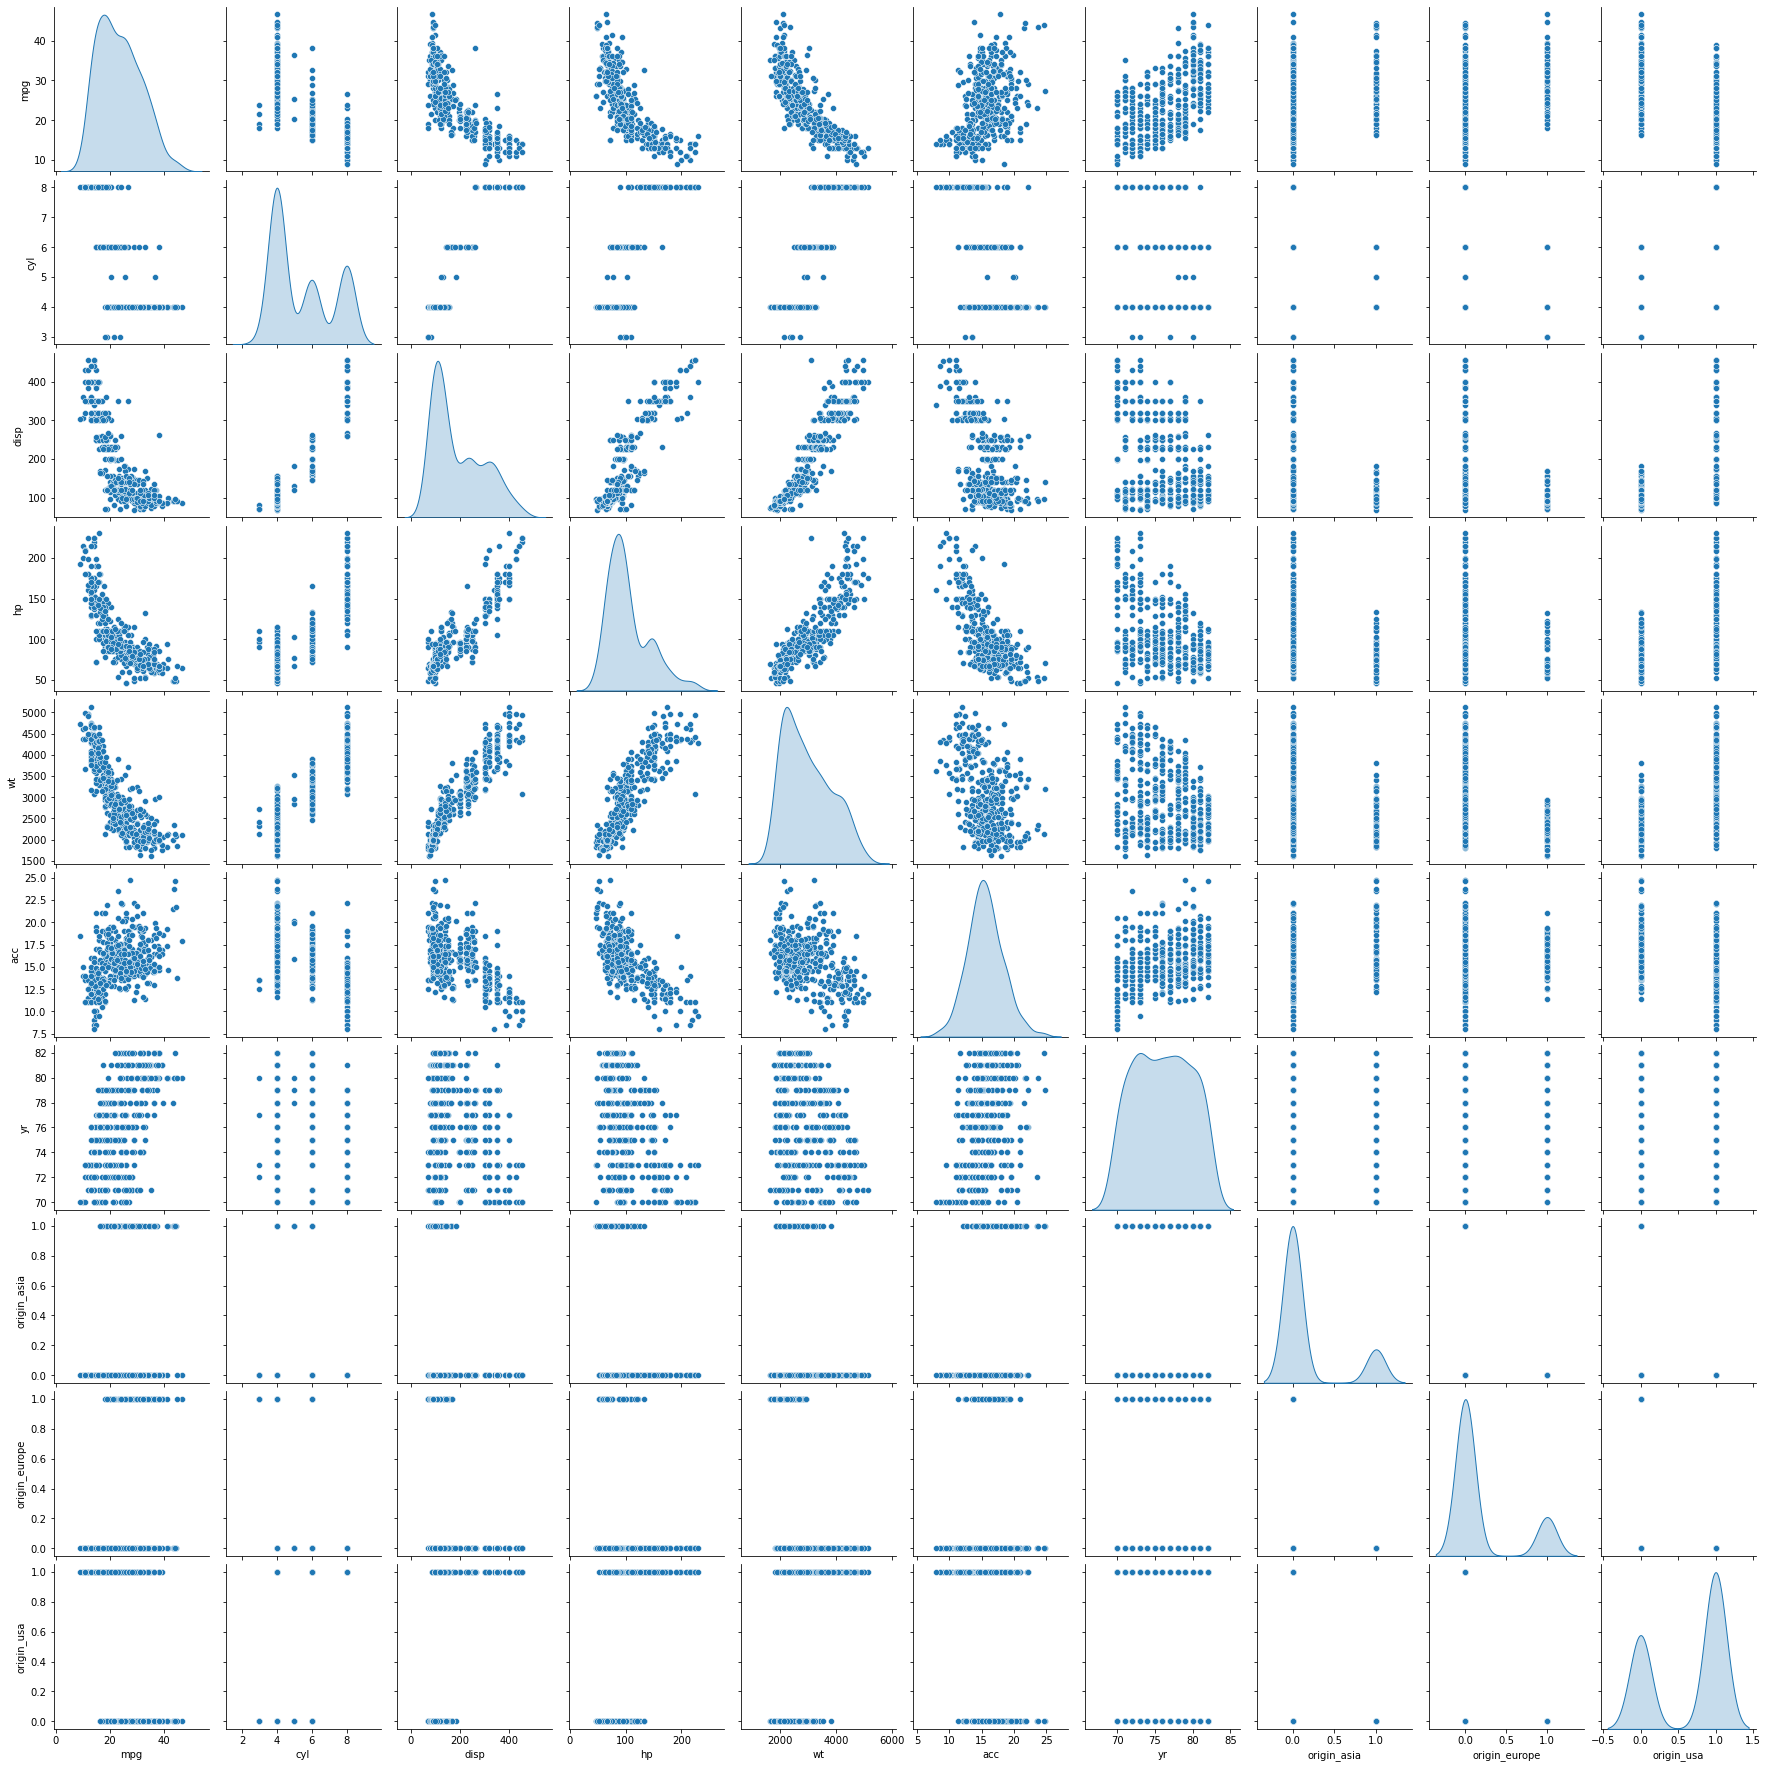

In [30]:
sns.pairplot(data,diag_kind='kde')

# split data

In [32]:
x=data.drop(['mpg'],axis=1)  ##independent variables
y=data[['mpg']]  ##dependent

In [33]:
## split x and y into training and test set in 70:30 rato
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

# fit linear model

In [38]:
reg_model = LinearRegression()
reg_model.fit(x_train, y_train)

LinearRegression()

In [40]:
reg_model.score(x_train, y_train)

0.8141025501610559

In [41]:
reg_model.score(x_test, y_test)

0.843313513280883

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly=PolynomialFeatures(degree=2,interaction_only=True)
x_train2=poly.fit_transform(x_train)
x_test2=poly.fit_transform(x_test)

poly_clf=linear_model.LinearRegression()

poly_clf.fit(x_train2,y_train)

print(poly_clf.score(x_train2,y_train))

0.9015333047861899


In [47]:
print(poly_clf.score(x_test2,y_test))

0.8647737718705799
